# Gaussian Process Regression


________
###  Table of content

[1. Regression model](#model)<br>
[2. Prediction](#Prediction)<br>
[3. Finding the best kernel parameters](#kernel)<br>
_________

**Dataset :**

Let $(X_i)_{i\in[\![1,n]\!]}$ be i.i.d. random variables in $\mathbb{R}^d$ and consider the matrix $X \in \mathbb{R}^{n . d}$ such that the i-th row of $X$ is the observation $X_i^T$. For all $1 \leq i \leq n$, $X_i$ is an individual which has been associated with the label $Y_i \in \mathbb{R}$, and consider the matrix $Y = [Y_1, Y_2, ..., Y_n]^T \in \mathbb{R}^n$.

<a id='model'></a>
## 1. Regression model

In the Gaussian process regression model, $Y = f(X) + \epsilon$. 
<br><br>
The $(\epsilon_i)_{i\in[\![1,n]\!]} \in \mathbb{R}^n$ are the i.i.d. noise variables with independant normal distributions, so that $\epsilon = [\epsilon_1, \epsilon_2, ... \epsilon_n]^T \sim N(0, \sigma ^2 I_n)$.
$ f$ is a Gaussian Process, i.e. an n-dimensional vector, defined by :


$$
f(.) \sim \mathcal{GP}(0, k_{\gamma}(. , .))
$$

where $k_{\gamma}(. , .)$ is a valid covariance function and $\gamma$ is the parameter to optimize.

A commonly used kernel function is the squared exponential or radial basis function (RBF) kernel, defined as follows:

$$k_\gamma (z, z') = \exp(-\frac{\parallel z - z' \parallel ^2}{2 \gamma^2})$$


<a id='prediction'></a>
## 2. Prediction

Gaussian Process Regression is a nonparametric model. Therein, prediction will be directly performed using the conditionnal gaussian distribution.

Given a dataset of observed outputs $ \lbrace (x_i, y_i) \rbrace_{1 \leq i \leq n}$, we want to predict the output $Y_{test}$ of a test set $X_{test}$ drawn from the same distribution.


With $Y_0 = [Y_{test}, Y]^T$, $X_0 = [X_{test}, X]^T$ and $\epsilon_0 = [0, \epsilon]^T$, the model is thus :


$$Y_0 = f(X_0) + \epsilon_0 \sim N(0, K_0 + \sigma^2I_n)$$


where 
$$K_0 = \begin{pmatrix}
          K_{aa} & K_{ab} \\
          K_{ba} & K_{bb} \\
         \end{pmatrix}$$ and 
$$\begin{equation}
    \begin{cases}
      K_{aa} = (k_\gamma(X_i, X_j))\\
      K_{ab} = (k_\gamma(X_i, X_{test, j}))\\
      K_{ba} = (k_\gamma(X_{test, i}, X_j))\\
      K_{bb} = (k_\gamma(X_{test, i}, X_{test, j}))
    \end{cases}       
\end{equation}$$

We can then compute the conditional distribution $(Y_{test}|X_{test}, X, Y) \sim \mathcal{N}(m, D)$ by using the conditional Gaussian distribution formulas :


$$\begin{equation}
    \begin{cases}
      m = K_{ab}K_{bb}^{-1}Y\\
      D = (K_{aa} + \sigma^2I_n) - K_{ab}K_{bb}^{-1}K_{ba}
    \end{cases}       
\end{equation}$$


<a id='kernel'></a>
## 3. Finding the best kernel parameters

With $X$, $Y$ and $\epsilon$ as previously defined, let's apply the model to the dataset : $Y = f(X) + \epsilon$.

As f(.) is a Gaussian Process, $f(X) \sim N(0, K_\gamma)$ where $K_\gamma = (k_\gamma (X_i, X_j))_{i,j \in [\![1,n]\!]}$, and since $\epsilon \sim N(0, \sigma ^2 I_n)$, it implies that $ (Y | X; \gamma) \sim N(0, K_\gamma + \sigma ^2 I_n)$.

Consequently, the probability distribution is:  
$$P(Y=y | X; \gamma) = \frac{1}{(2\pi)^{n/2} det(K_\gamma + \sigma^2 I_n)^{1/2}}exp(-\frac{1}{2} y^T (K_\gamma + \sigma^2 I_n)^{-1} y)$$


The likelihood of the model, given the observed data, is defined as:  
$$L(\gamma) = P(Y=y | X; \gamma)$$


The aim of the training is to find the parameters $\gamma$ which maximizes the likelihood function (Maximum Likelihood Estimation), which is the same as minimizing the negative log-likelihood. To unify with the neural network architecture used later, we chose to minimize the negative log-likelihood :  
$$l(\gamma) = - \log (P(Y=y | X; \gamma))$$


The resulting equation is thus:  
$$l(\gamma) = \frac{1}{2} ( n\log(2\pi) + \log det(K_\gamma + \sigma^2 I_n) + y^T (K_\gamma + \sigma^2 I_n)^{-1} y )$$

To simplify this, we can rewrite $K_\gamma + \sigma ^2 I_n$ as $K_\gamma$.

Again, to unify this with the neural network approach (based on the chain rule), we need to compute the derivative of the negative log-likelihood with respect to $K_\gamma$ :  
$$\frac {\partial l}{\partial K_\gamma} = \frac{1}{2} ( \frac {\partial n\log(2\pi)}{\partial K_\gamma} + \frac {\partial \log det K_\gamma }{\partial K_\gamma} + \frac {\partial y^T K_\gamma^{-1} y )}{\partial K_\gamma})$$


Pre-requisites :
$$\begin{equation}
    \begin{cases}
      \frac {\partial \log \det A}{\partial A} = A^{-1}\\
      \frac {\partial A^{-1}}{\partial A} = -(A^{-1}) (A^{-1})\\
    \end{cases}       
\end{equation}$$

Consequently :
$$\begin{equation}
    \begin{cases}
      \frac {\partial n\log(2\pi)}{\partial K_\gamma} = 0\\
      \frac {\partial \log det K_\gamma}{\partial K_\gamma} = K_\gamma ^{-1}\\
      \frac {\partial y^T K_\gamma^{-1} y}{\partial K_\gamma} = - K_\gamma^{-1} y y^T K_\gamma^{-1}
    \end{cases}       
\end{equation}$$


> PROOF for $\frac {\partial y^T K_\gamma^{-1} y}{\partial K_\gamma} = - K_\gamma^{-1} y y^T K_\gamma^{-1}$ :
>
> As $y^T K_\gamma^{-1} y = \sum_{i,j} y_i y_j (K_\gamma^{-1})_{i,j}$, 
> $$\frac {\partial y^T K^{-1} y}{\partial K_{k,l}} = \sum_{i,j} y_i y_j (\frac {\partial K^{-1}} {\partial K_{k,l}})_{i,j}$$ 
>
> Given that $\frac {\partial K^{-1}} {\partial K_{k,l}} =  - K^{-1} \frac {\partial K}{\partial K_{k,l}} K^{-1}$  and that the derivative with respect to the coordinate (k,l) is equal to a (n,n) null matrix with a 1 at position (k,l),  it ends up with the following equation:
> $$\frac {\partial K^{-1}} {\partial K_{k,l}} =  - K^{-1} \frac {\partial K}{\partial K_{k,l}} K^{-1} = - [(K^{-1}_{ik} K^{-1}_{lj})_{i,j}]$$
> Consequently :
$$(\frac {\partial K^{-1}} {\partial K_{k,l}})_{i,j} = - K^{-1}_{ik} K^{-1}_{lj}$$
Finally, the derivative equals : 
$$\frac {\partial y^T K^{-1} y}{\partial K_{k,l}} = \sum_{i,j} - y_i y_j K^{-1}_{ik} K^{-1}_{lj}.$$
>
> This may be written as :
> $$\frac {\partial y^T K^{-1} y}{\partial K_\gamma}  = - K_\gamma^{-1} y y^T K_\gamma^{-1}$$

Finally :  
$$\frac {\partial l}{\partial K_\gamma} = \frac{1}{2} (K_\gamma ^{-1} - K_\gamma^{-1} y y^T K_\gamma^{-1})$$


In Deep Kernel Learning, we have $K_{\gamma, w} = (k_\gamma (h_w(X_i), h_w(X_j))_{i,j \in [|1,n|]})$ where $h_w(.)$ represents the Neural Network.


During the backpropagation, we use the chain rule to compute $\frac {\partial K_{\gamma, w}}{\partial \gamma}$ and $\frac {\partial K_{\gamma, w}}{\partial w}$ in the following way :  

$$\begin{equation}
    \begin{cases}
      \frac {\partial l}{\partial \gamma} = \frac {\partial l}{\partial K_{\gamma, w}} \frac {\partial K_{\gamma, w}}{\partial \gamma}\\
      \frac {\partial l}{\partial w} = \frac {\partial l}{\partial K_{\gamma, w}} \frac {\partial K_{\gamma, w}}{\partial w}
    \end{cases}       
\end{equation}$$


# Implementation

## Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
df_rwanda = pd.read_csv('./data/rwanda')
df_rwanda.head()

,Unnamed: 0,cluster,latitude,longitude,wealth_index,mean_light,median_light,std_light,min_light,max_light
0,0,1,-2.532818,29.684726,-0.531405,0.06,0.0,0.596992,0.0,6.0
1,1,2,-1.833858,30.310689,-0.409830,0.00,0.0,0.000000,0.0,0.0
2,2,3,-1.888155,29.478298,-0.478115,0.00,0.0,0.000000,0.0,0.0
3,3,4,-2.366763,30.521692,-0.435960,0.00,0.0,0.000000,0.0,0.0
4,4,5,-2.171266,30.018541,-0.449480,0.00,0.0,0.000000,0.0,0.0


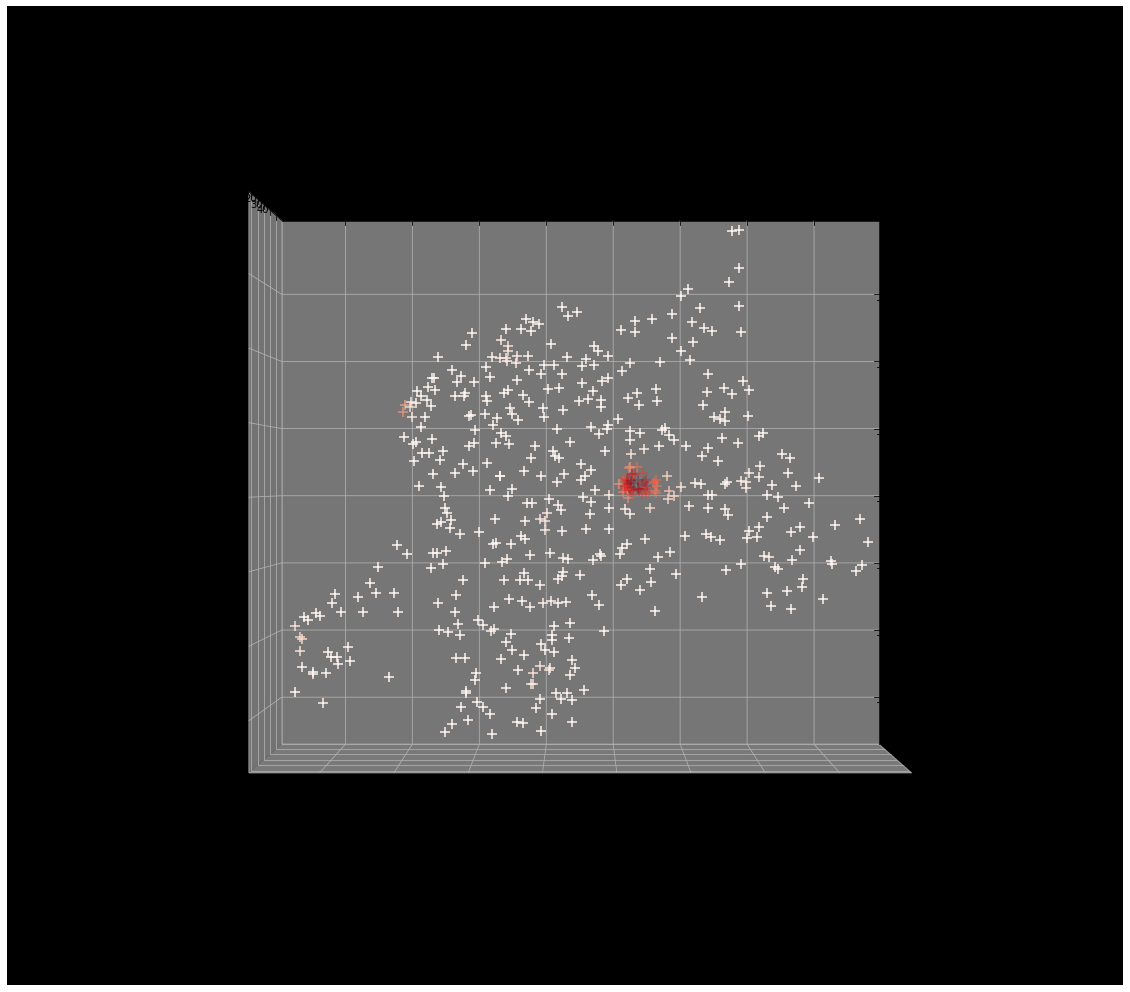

In [3]:
fig = plt.figure(figsize=(20, 18))
ax = fig.gca(projection='3d')
ax.view_init(-90, 0)
ax.set_facecolor('black')
X = df_rwanda['latitude']
Y = df_rwanda['longitude']
Z = df_rwanda['mean_light']
ax.scatter3D(X, Y, Z, c=Z, cmap='Reds', s=100, marker='+')

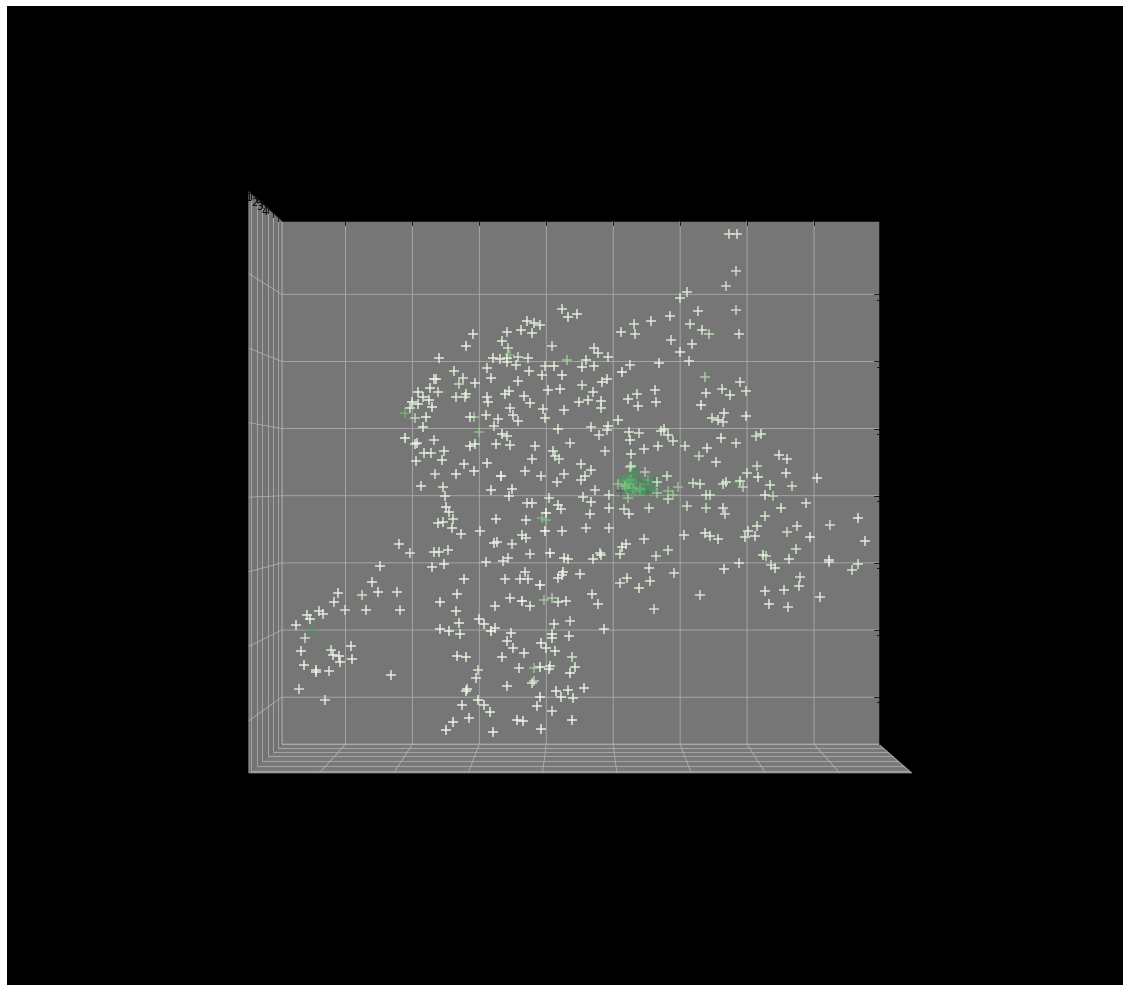

In [4]:
fig = plt.figure(figsize=(20, 18))
ax = fig.gca(projection='3d')
ax.view_init(-90, 0)
ax.set_facecolor('black')
X = df_rwanda['latitude']
Y = df_rwanda['longitude']
Z = df_rwanda['wealth_index']
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens', s=100, marker='+')

## Model

In [24]:
from scipy.linalg import cholesky, cho_solve, inv, det, norm

class GaussianProcessRegression:
    
    def __init__(self, sigma=0.01, gamma=None):
        self.sigma = sigma
        self.gamma = gamma
        
        self.X = None
        self.y = None
        
        self.L = None
        self.alpha = None
        
    def kernel(self, x, y):
        return np.exp((-0.5 / self.gamma ** 2) * norm(x - y) ** 2)
    
    def loss(self):
        n, _ = np.shape(self.X)
        
        K_bb = None
        K_bb = [[self.kernel(self.X[i], self.X[j]) for i in range(n)] for j in range(n)]
        K_bb += self.sigma**2 * np.identity(n)
        K_bb = np.array(K_bb)
        K_bb_inv = inv(K_bb)
        
        l = n * np.log(2 * np.pi) + det(K_bb) + np.dot(self.y.T, K_bb_inv).dot(self.y)
        l *= 0.5
        
        tmp = [[(norm(self.X[i] - self.X[j]) ** 2) for i in range(n)] for j in range(n)]
        tmp = np.array(tmp)
        tmp /= np.abs(self.gamma ** 3)
        K_grad = np.dot(tmp, K_bb)
        dgamma = np.trace(np.dot(K_bb_inv, K_grad)) - np.dot(np.dot(self.y.T, K_bb_inv), K_grad).dot(np.dot(K_bb_inv, self.y))
        dgamma *= 0.5
        
        return l, dgamma
        
    def train(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
        
        if self.gamma == None:
            # Choose hyperparameters based on maximizing the log-marginal likelihood
            learning_rate = 1e4
            self.gamma = np.random.randn()
            tmp = 1
            print('init :', self.gamma)
            #while np.abs(tmp) > 1e-3:
            for k in range(10):
                l, dgamma = self.loss()
                self.gamma = self.gamma - (learning_rate / dgamma[0][0] ** 2) * dgamma[0][0]
                tmp = (learning_rate / dgamma[0][0] ** 2) * dgamma[0][0]
                print(tmp)
                print('gamma :', self.gamma, 'dgamma', dgamma[0][0], 'loss :', l[0][0])
        
        # Precompute quantities required for predictions which are independent of actual query points
        n, _ = np.shape(self.X)
        
        K_bb = [[self.kernel(self.X[i], self.X[j]) for i in range(n)] for j in range(n)]
        K_bb += self.sigma**2 * np.identity(n)
        K_bb = np.array(K_bb)
        
        self.L = cholesky(K_bb, lower=True)
        self.alpha = cho_solve((self.L, True), self.y)
        #self.alpha = cho_solve((self.L.T, True), self.alpha)
        
    def predict(self, X_test):
        n, _ = np.shape(self.X)
        p, _ = np.shape(X_test)
        
        K_aa = [[self.kernel(X_test[i], X_test[j]) for j in range(p)] for i in range(p)]
        K_ab = [[self.kernel(X_test[i], self.X[j]) for j in range(n)] for i in range(p)]
        
        K_aa = np.array(K_aa)
        K_ab = np.array(K_ab)
        K_ba = K_ab.T
        
        v = cho_solve((self.L, True), K_ba)
        cov = (K_aa + self.sigma**2 * np.identity(p)) - np.dot(v.T, v)
        
        m_test = np.dot(K_ab, self.alpha)
        
        return m_test, cov

# Training

## without nightlight intensities

In [150]:
X = df_rwanda[['latitude', 'longitude']]
y = df_rwanda['wealth_index']

X = np.resize(X, (X.shape[0], X.shape[1]))
y = np.resize(y, (y.shape[0], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [155]:
model = GaussianProcessRegression(gamma=0.30)
model.train(X_train, y_train)

preds = model.predict(X)[0]
test_preds = model.predict(X_test)[0]
train_preds = model.predict(X_train)[0]

c1 = np.linalg.norm(y_test - test_preds) / y_test.shape[0]
c2 = np.linalg.norm(y_train - train_preds) / y_train.shape[0]
print('train cost :', c2)
print('test cost :', c1)

train cost : 0.02167035547366247
test cost : 0.05568564478405448


In [156]:
lats = X[:, 0]
longs = X[:, 1]
preds = preds.reshape((X.shape[0],))

df_train = pd.DataFrame({'latitude':lats, 'longitude':longs, 'wealth_index_predicted':preds})
df_train.head()

,latitude,longitude,wealth_index_predicted
0,-2.532818,29.684726,-0.265882
1,-1.833858,30.310689,-0.448226
2,-1.888155,29.478298,-0.266708
3,-2.366763,30.521692,-0.440272
4,-2.171266,30.018541,-0.577882


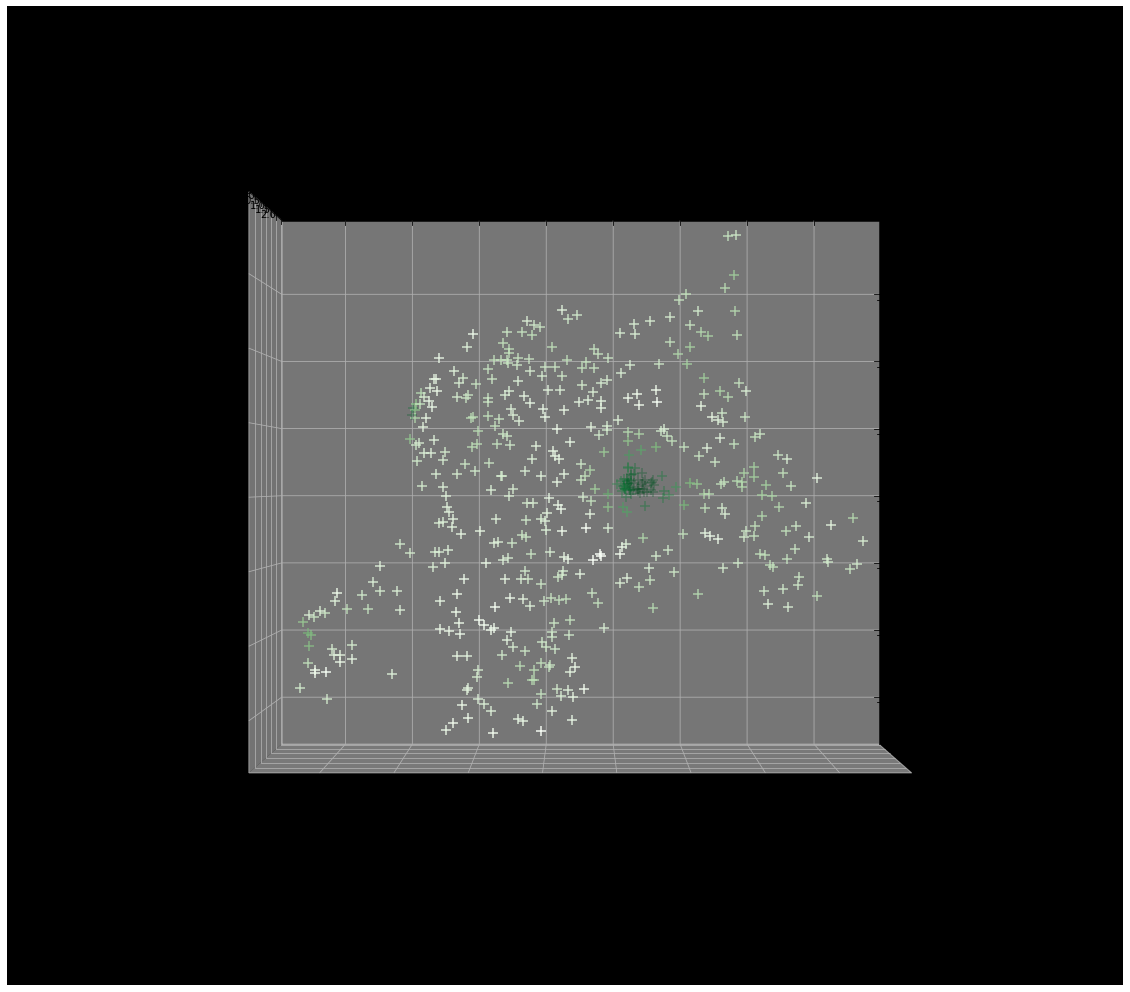

In [157]:
fig = plt.figure(figsize=(20, 18))
ax = fig.gca(projection='3d')
ax.view_init(-90, 0)
ax.set_facecolor('black')
X = df_train['latitude']
Y = df_train['longitude']
Z = df_train['wealth_index_predicted']
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens', s=100, marker='+')

## without nightlight intensities

In [200]:
X = df_rwanda[['latitude', 'longitude']]
y = df_rwanda['wealth_index']

X = np.resize(X, (X.shape[0], X.shape[1]))
y = np.resize(y, (y.shape[0], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [201]:
model = GaussianProcessRegression(gamma=0.245)
model.train(X_train, y_train)

preds = model.predict(X)[0]
test_preds = model.predict(X_test)[0]
train_preds = model.predict(X_train)[0]

c1 = np.sqrt(np.linalg.norm(y_test - test_preds) ** 2 / y_test.shape[0])
c2 = np.sqrt(np.linalg.norm(y_train - train_preds) ** 2 / y_train.shape[0])
print('train cost :', c2)
print('test cost :', c1)

train cost : 0.3884810252335164
test cost : 0.5246826512985179


In [202]:
lats = X[:, 0]
longs = X[:, 1]
preds = preds.reshape((X.shape[0],))

df_train = pd.DataFrame({'latitude':lats, 'longitude':longs, 'wealth_index_predicted':preds})
df_train.head()

,latitude,longitude,wealth_index_predicted
0,-2.532818,29.684726,-0.142270
1,-1.833858,30.310689,-0.465138
2,-1.888155,29.478298,-0.331629
3,-2.366763,30.521692,-0.423667
4,-2.171266,30.018541,-0.443740


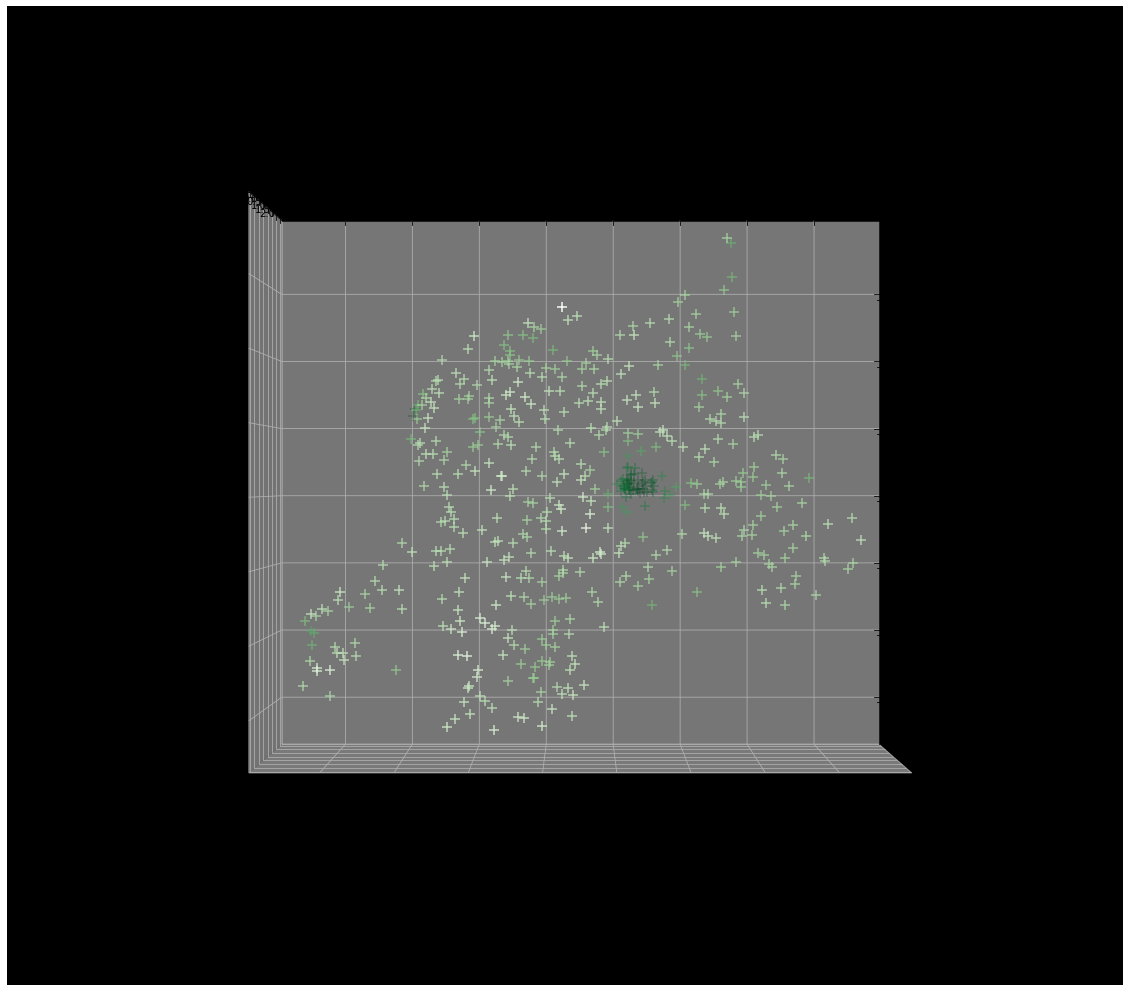

In [203]:
fig = plt.figure(figsize=(20, 18))
ax = fig.gca(projection='3d')
ax.view_init(-90, 0)
ax.set_facecolor('black')
X = df_train['latitude']
Y = df_train['longitude']
Z = df_train['wealth_index_predicted']
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens', s=100, marker='+')

# Bibliographie

Gaussian Process theory : http://www.gaussianprocess.org/gpml/chapters/RW.pdf